# IE 423 PROJECT PART 1
<p>Batuhan Özkan<br>
Kaan Ertan<br>
Melis Tuncer</p>

## Introduction 
In this project, we examined 6 companies’ stock prices over the years 2014-2015. We chose 2 companies from the banking industry, 2 from the aviation transport industry, and 2 holding companies: Akbank(AKBNK), Garanti(GARAN), Turkish Airlines(THYAO), Pegasus Airlines(PGSUS), Sabancı Holding(SAHOL), Koç Holding(KCHOL). We built box plots for the relevant data and constructed control charts in order to determine the outliers in the stock price data. Then, we further examined the outliers to root out their potential causes. We cross-checked them with data from Google Trends as well as financial news sources from the years 2014-15.<br>

In this report, we document the monthly boxplots for the stock prices of each company over these 2 years, and the 3-sigma limited control charts for the months that include at least one outlier data. For these outlier formations, we suggest explanations with the help of market dynamics and real-world events.


## Source Code of Data Manipulation for Boxplots

**Below, we open and read all the data, select 6 companies among them, select 2 year-span to work (2014 & 2015), add new columns for year, month, etc.**

In [1]:
# Import required packages
import pandas as pd         
import gzip
import matplotlib.pyplot as plt  

# Open and read the stock file provided
# Then convert the whole file to a data frame

with gzip.open('all_ticks_long.csv.gz', 'rt') as file:
    df = pd.read_csv(file)

In [2]:
# Find all companies included
company_names = df['short_name'].unique()

# Select 6 companies to work with
our_companies = ['KCHOL', 'SAHOL', 'GARAN', 'AKBNK', 'PGSUS', 'THYAO']


# For each company chosen, take the rows containing the company names, then reorder the rows with respect to time, and adjust the indices 
# By this, we have a separate data frame for each company

kchol_df = df[df['short_name'].str.contains('KCHOL')].sort_values(by= 'timestamp').reset_index(drop=True)
sahol_df = df[df['short_name'].str.contains('SAHOL')].sort_values(by= 'timestamp').reset_index(drop=True)
garan_df = df[df['short_name'].str.contains('GARAN')].sort_values(by= 'timestamp').reset_index(drop=True)
akbnk_df = df[df['short_name'].str.contains('AKBNK')].sort_values(by= 'timestamp').reset_index(drop=True)
pgsus_df = df[df['short_name'].str.contains('PGSUS')].sort_values(by= 'timestamp').reset_index(drop=True)
thyao_df = df[df['short_name'].str.contains('THYAO')].sort_values(by= 'timestamp').reset_index(drop=True)


# Check if any data frame has nan values
nan_count_1 = kchol_df.isna().sum()
nan_count_2 = sahol_df.isna().sum()
nan_count_3 = garan_df.isna().sum()
nan_count_4 = akbnk_df.isna().sum()
nan_count_5 = pgsus_df.isna().sum()
nan_count_6 = thyao_df.isna().sum()

print(nan_count_1)
print(nan_count_2)
print(nan_count_3)
print(nan_count_4)
print(nan_count_5)
print(nan_count_6)

short_name    0
timestamp     0
price         0
dtype: int64
short_name    0
timestamp     0
price         0
dtype: int64
short_name    0
timestamp     0
price         0
dtype: int64
short_name    0
timestamp     0
price         0
dtype: int64
short_name    0
timestamp     0
price         0
dtype: int64
short_name    0
timestamp     0
price         0
dtype: int64


The data was cleared beforehand, so there are no nan values.

In [3]:
# Write a function for splitting the timestamp column into Year, Month, Day, Hour, Minute, and Second columns
# Then reconstruct the data frame with those additional columns

def split_timestamp (df):
    times_df = df['timestamp'].str.split('[-T:]', expand=True)
    merged = pd.concat([df, times_df], axis=1)
    columns = ['company', 'timestamp', 'price', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']
    merged.columns = columns
    return merged

kchol_merged_df = split_timestamp(kchol_df)
sahol_merged_df = split_timestamp(sahol_df)
garan_merged_df = split_timestamp(garan_df)
akbnk_merged_df = split_timestamp(akbnk_df)
pgsus_merged_df = split_timestamp(pgsus_df)
thyao_merged_df = split_timestamp(thyao_df)


# Define a list of years to remove
years_to_remove = ['2012', '2013', '2016', '2017', '2018', '2019']

# Remove rows with 'Year' values in the list
kchol_merged_df = kchol_merged_df[~kchol_merged_df['Year'].isin(years_to_remove)]
sahol_merged_df = sahol_merged_df[~sahol_merged_df['Year'].isin(years_to_remove)]
garan_merged_df = garan_merged_df[~garan_merged_df['Year'].isin(years_to_remove)]
akbnk_merged_df = akbnk_merged_df[~akbnk_merged_df['Year'].isin(years_to_remove)]
pgsus_merged_df = pgsus_merged_df[~pgsus_merged_df['Year'].isin(years_to_remove)]
thyao_merged_df = thyao_merged_df[~thyao_merged_df['Year'].isin(years_to_remove)]

In [4]:
# Write a function to have a separate data frame for each month for each company

def group_by_month(df):
    list=[]
    grouped_year = df.groupby('Year')
    for group_name, group_df in grouped_year:
        list.append(group_df)

    grouped_month = []
    for i in list:
        x = i.groupby('Month')
        for group_name, group_df in x:
            grouped_month.append(group_df)

    return grouped_month


kchol_grouped_data = group_by_month(kchol_merged_df)
sahol_grouped_data = group_by_month(sahol_merged_df)
garan_grouped_data = group_by_month(garan_merged_df)
akbnk_grouped_data = group_by_month(akbnk_merged_df)
pgsus_grouped_data = group_by_month(pgsus_merged_df)
thyao_grouped_data = group_by_month(thyao_merged_df)

# The output of the above function is a list. The list items are data frames. For example, the first item in 'kchol_grouped_data' list
    # is the data frame of KCHOL stock in the first month (for our case, the first month is 2014 January).


**An example first item (the data frame of the first month) of 'kchol_grouped_data' list:** 

In [5]:
print(kchol_grouped_data[0])

     company             timestamp   price  Year Month Day Hour Minute Second
8263   KCHOL  2014-01-02T07:30:00Z  7.7714  2014    01  02   07     30    00Z
8264   KCHOL  2014-01-02T07:45:00Z  7.8255  2014    01  02   07     45    00Z
8265   KCHOL  2014-01-02T08:00:00Z  7.8255  2014    01  02   08     00    00Z
8266   KCHOL  2014-01-02T08:15:00Z  7.8255  2014    01  02   08     15    00Z
8267   KCHOL  2014-01-02T08:30:00Z  7.8437  2014    01  02   08     30    00Z
...      ...                   ...     ...   ...   ...  ..  ...    ...    ...
8840   KCHOL  2014-01-31T14:30:00Z  6.8699  2014    01  31   14     30    00Z
8841   KCHOL  2014-01-31T14:45:00Z  6.9059  2014    01  31   14     45    00Z
8842   KCHOL  2014-01-31T15:00:00Z  6.8879  2014    01  31   15     00    00Z
8843   KCHOL  2014-01-31T15:15:00Z  6.9059  2014    01  31   15     15    00Z
8844   KCHOL  2014-01-31T15:30:00Z  6.9059  2014    01  31   15     30    00Z

[582 rows x 9 columns]


## Boxplots for the Stock Price Data

**Below, we construct a boxplot for each company. The x-axis represents the month number. For example, the boxplot at month = 1 belongs to January, 2024. The boxplot at month = 13 belongs to January, 2015.**

**BOXPLOTS FOR KCHOL (KOÇ HOLDİNG):**

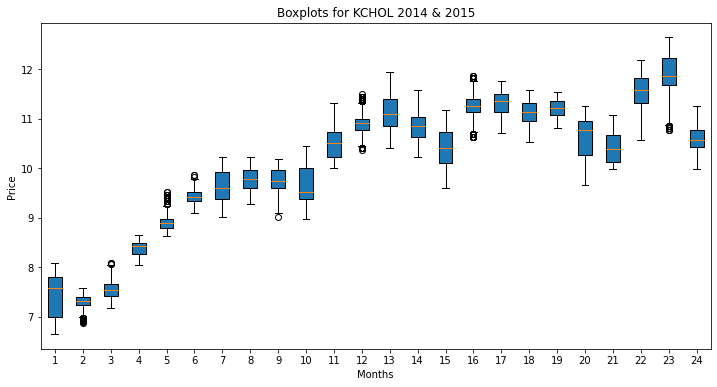

In [6]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in kchol_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for KCHOL 2014 & 2015')

# Display the plot
plt.show()


**BOXPLOTS FOR SAHOL (SABANCI HOLDİNG):**

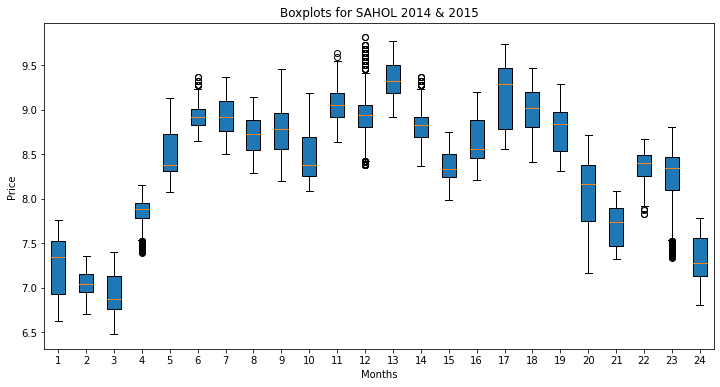

In [7]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in sahol_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for SAHOL 2014 & 2015')

# Display the plot
plt.show()


**BOXPLOTS FOR GARAN (GARANTİ BANKASI):**

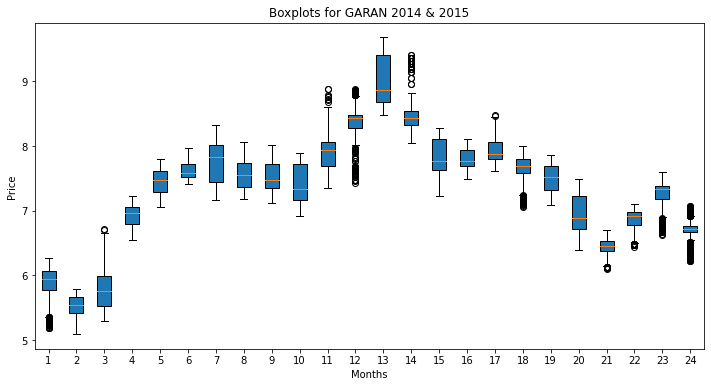

In [8]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in garan_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for GARAN 2014 & 2015')

# Display the plot
plt.show()


**BOXPLOTS FOR AKBNK (AKBANK):**

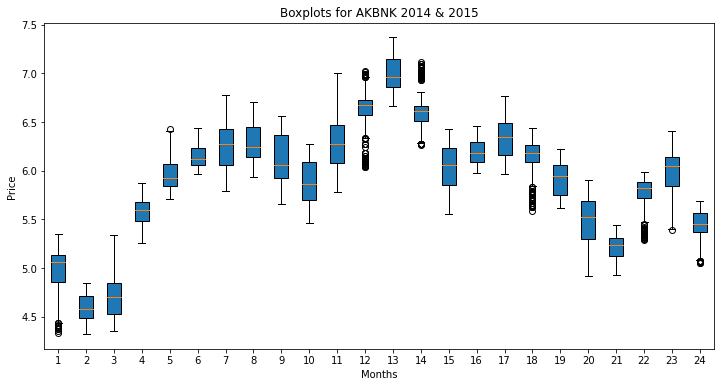

In [9]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in akbnk_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for AKBNK 2014 & 2015')

# Display the plot
plt.show()


**BOXPLOTS FOR PGSUS (PEGASUS HAVAYOLLARI):**

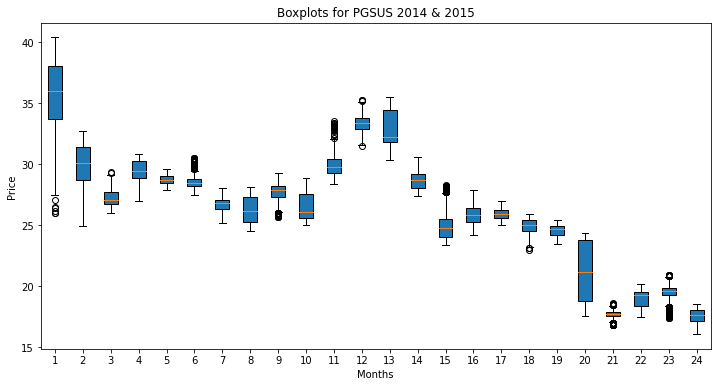

In [10]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in pgsus_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for PGSUS 2014 & 2015')

# Display the plot
plt.show()


**BOXPLOTS FOR THYAO (TÜRK HAVA YOLLARI):**

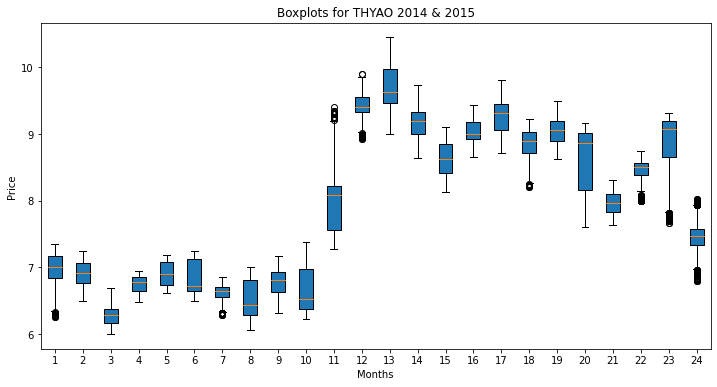

In [11]:
# Extract 'Price' columns from all DataFrames
all_prices = [df['price'] for df in thyao_grouped_data]

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with the 'all_prices' list
bp = ax.boxplot(all_prices, patch_artist=True, labels=range(1, 25))

# Set labels for the x-axis and y-axis
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Set a title for the entire graph
ax.set_title('Boxplots for THYAO 2014 & 2015')

# Display the plot
plt.show()


## Control Charts of the Months that Include Outlier Data

**Below, we construct a control chart with 3-sigma rule for each month that includes outlier for each company.**

In [12]:
def find_outliers(list):
    for i in list:      # list parameter will be the list of dataframes of each company. We iterate the list to get the data frame of each month and calculate the required statistics.
        mean = i['price'].mean()       # Calculate the mean of current data frame
        std_dev = i['price'].std()          # Calculate the standand deviation of current data frame
        df = i

        lower_bound = mean - 3 * std_dev        # Calculate the lower control limit with 3-sigma
        upper_bound = mean + 3 * std_dev        # Calculate the upper control limit with 3-sigma
        outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]    # Find the data points that exceed the limits and construct a dataframe of outliers.
        
        if not outliers.empty:      # Draw the line of each month only if there's outliers
            print(outliers)         # Print outliers' data frame for visibility

            x_values = i['timestamp']       # x-axis of the line is timestamp column
            y_values = i['price']           # y-axis of the line is price column
            fig, ax = plt.subplots(figsize=(12, 8))        

            ax.plot(x_values, y_values, label = 'Data Line' )  # Draw a line 
            plt.axhline(y=upper_bound, color='r', linestyle='--', label='Subline (y=upper_bound)')      # Draw the upper control limit
            plt.axhline(y=lower_bound, color='r', linestyle='--', label='Subline (y=lower_bound)')      # Draw the lower control limit
            plt.axhline(y=mean, color='g', linestyle='--', label='Subline (y=mean)')                    # Draw the mean
        
            highlight_x = outliers['timestamp']         # Select the outlier points
            highlight_y = outliers['price']

            plt.scatter(highlight_x, highlight_y, color='red', label=f'Point ({highlight_x}, {highlight_y})', zorder=5)   #   Draw the outlier points on the line
            plt.legend()

# This function will output the line-plot of each month that includes outliers

**The outlier points of KCHOL:**

     company             timestamp   price  Year Month Day Hour Minute Second
8873   KCHOL  2014-02-04T07:45:00Z  6.8699  2014    02  04   07     45    00Z
8874   KCHOL  2014-02-04T08:00:00Z  6.8879  2014    02  04   08     00    00Z
8878   KCHOL  2014-02-04T09:00:00Z  6.8879  2014    02  04   09     00    00Z
      company             timestamp   price  Year Month Day Hour Minute Second
10945   KCHOL  2014-05-30T06:30:00Z  9.4213  2014    05  30   06     30    00Z
10959   KCHOL  2014-05-30T11:30:00Z  9.4213  2014    05  30   11     30    00Z
10960   KCHOL  2014-05-30T11:45:00Z  9.5115  2014    05  30   11     45    00Z
10961   KCHOL  2014-05-30T12:00:00Z  9.4663  2014    05  30   12     00    00Z
10962   KCHOL  2014-05-30T12:15:00Z  9.4663  2014    05  30   12     15    00Z
10963   KCHOL  2014-05-30T12:30:00Z  9.4663  2014    05  30   12     30    00Z
10964   KCHOL  2014-05-30T12:45:00Z  9.5115  2014    05  30   12     45    00Z
10965   KCHOL  2014-05-30T13:00:00Z  9.4663  2014    05 

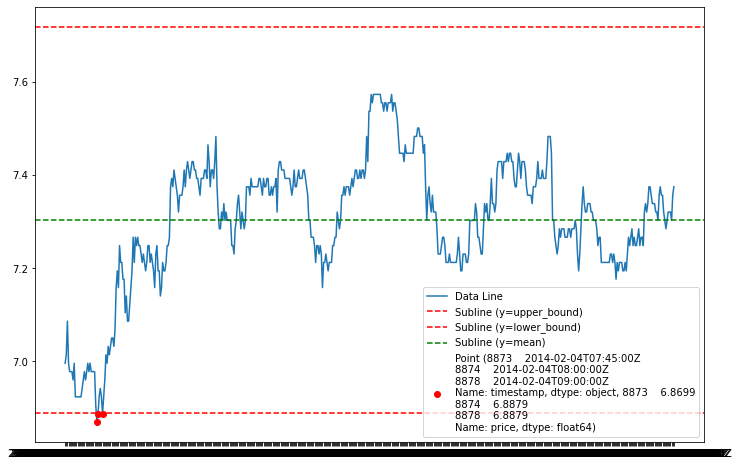

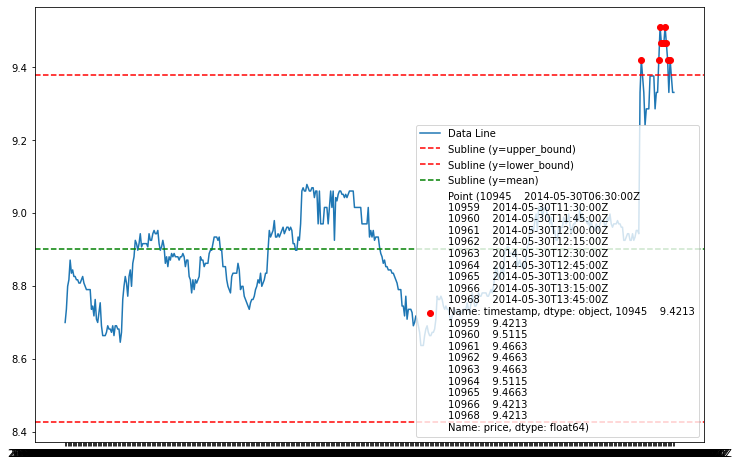

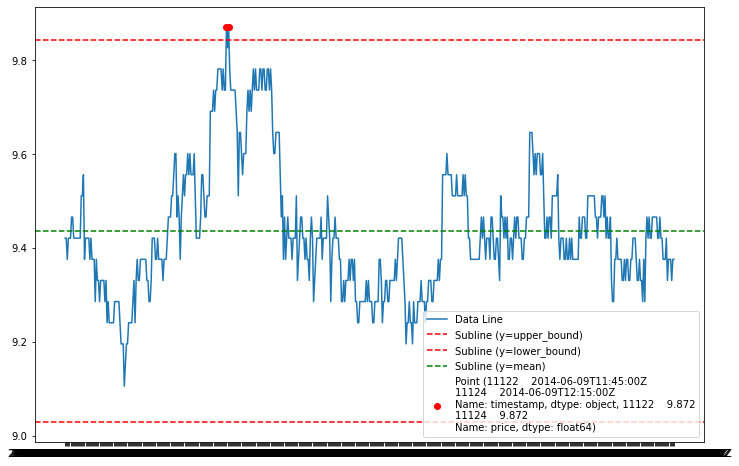

In [13]:
find_outliers(kchol_grouped_data)

**The outlier points of SAHOL:**

      company             timestamp   price  Year Month Day Hour Minute Second
11145   SAHOL  2014-06-11T06:30:00Z  9.3639  2014    06  11   06     30    00Z
11146   SAHOL  2014-06-11T06:45:00Z  9.3639  2014    06  11   06     45    00Z
      company             timestamp   price  Year Month Day Hour Minute Second
14270   SAHOL  2014-11-28T14:45:00Z  9.6315  2014    11  28   14     45    00Z
      company             timestamp   price  Year Month Day Hour Minute Second
14288   SAHOL  2014-12-01T12:30:00Z  9.8099  2014    12  01   12     30    00Z
14289   SAHOL  2014-12-01T12:45:00Z  9.8099  2014    12  01   12     45    00Z


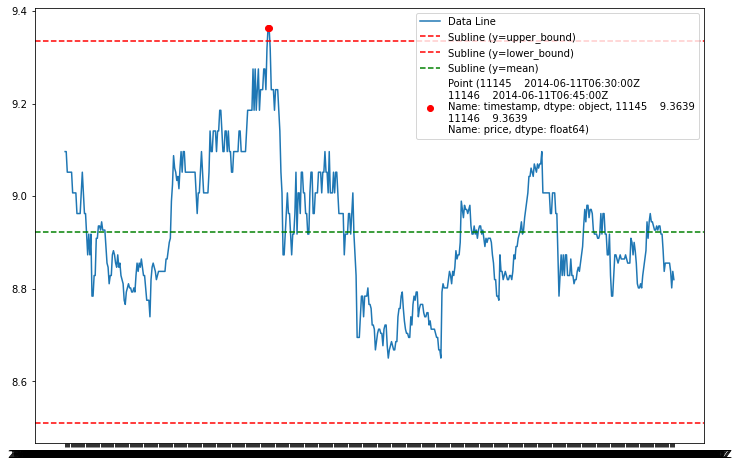

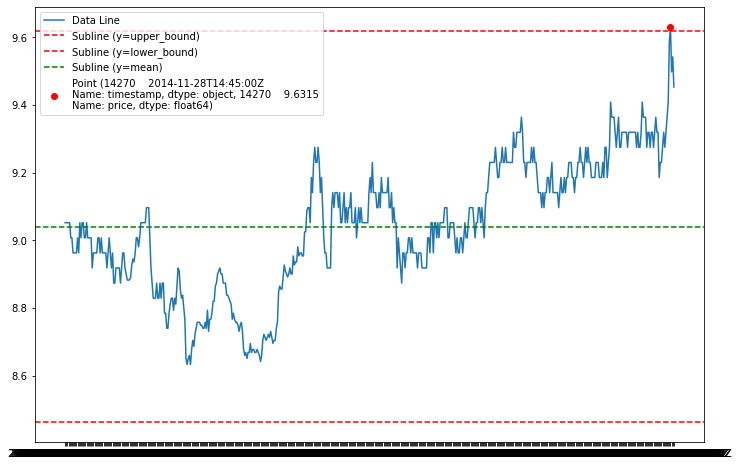

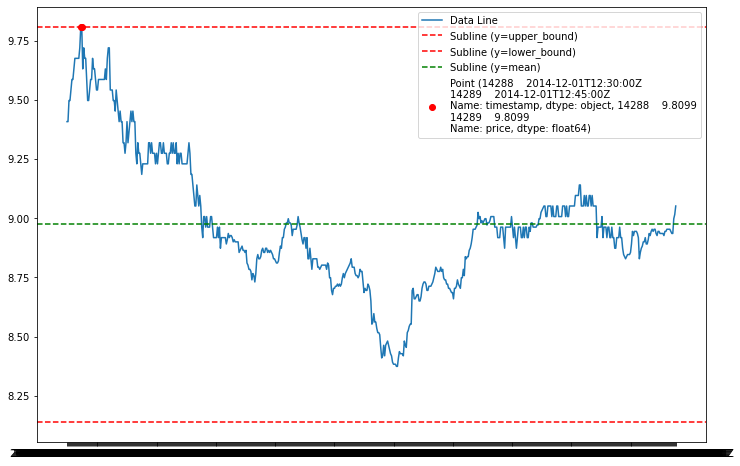

In [14]:
find_outliers(sahol_grouped_data)

**The outlier points of GARAN:**

      company             timestamp   price  Year Month Day Hour Minute Second
14433   GARAN  2014-11-28T14:30:00Z  8.8857  2014    11  28   14     30    00Z
14434   GARAN  2014-11-28T14:45:00Z  8.8766  2014    11  28   14     45    00Z
      company             timestamp   price  Year Month Day Hour Minute Second
14759   GARAN  2014-12-16T14:30:00Z  7.5352  2014    12  16   14     30    00Z
14760   GARAN  2014-12-16T14:45:00Z  7.4271  2014    12  16   14     45    00Z
14761   GARAN  2014-12-16T15:00:00Z  7.4631  2014    12  16   15     00    00Z
14762   GARAN  2014-12-16T15:15:00Z  7.4722  2014    12  16   15     15    00Z
14763   GARAN  2014-12-16T15:30:00Z  7.4722  2014    12  16   15     30    00Z
14764   GARAN  2014-12-17T07:30:00Z  7.4722  2014    12  17   07     30    00Z
14765   GARAN  2014-12-17T07:45:00Z  7.5262  2014    12  17   07     45    00Z
14766   GARAN  2014-12-17T08:00:00Z  7.5711  2014    12  17   08     00    00Z
14767   GARAN  2014-12-17T08:15:00Z  7.5711  2014   

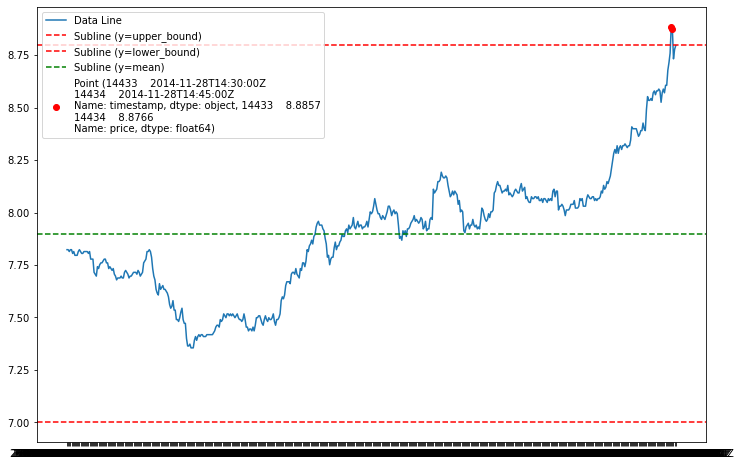

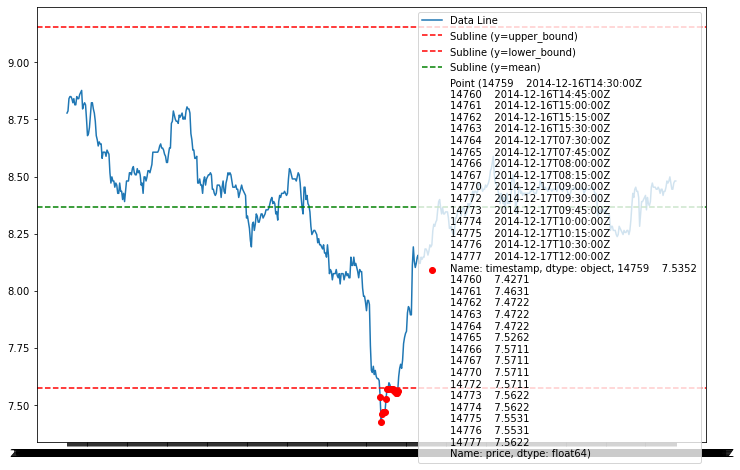

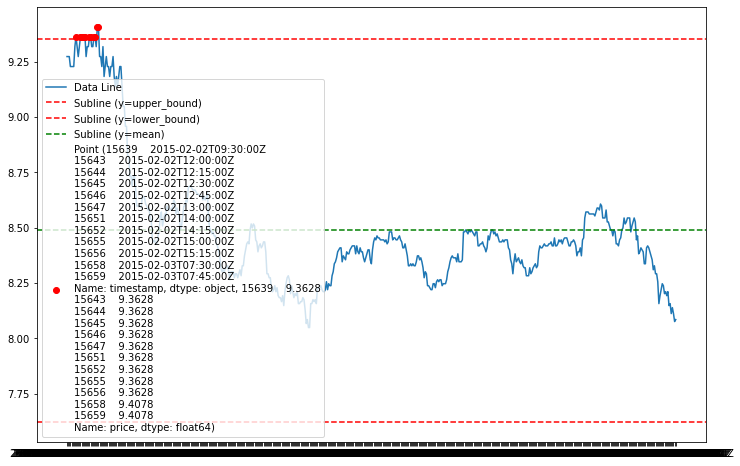

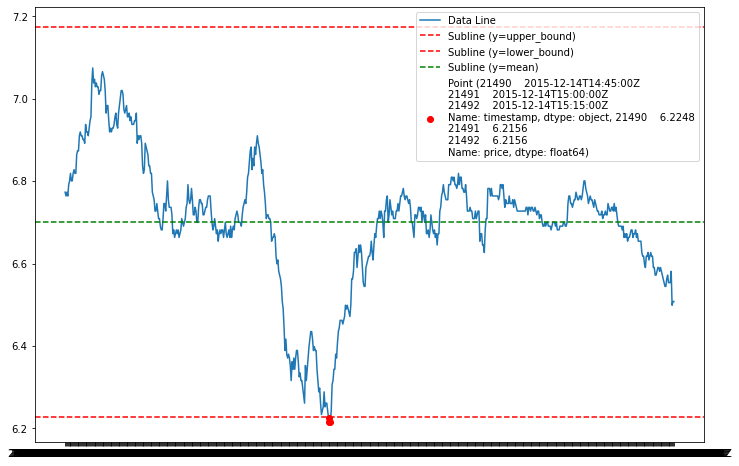

In [15]:
find_outliers(garan_grouped_data)

**The outlier points of AKBNK:**

      company             timestamp   price  Year Month Day Hour Minute Second
14726   AKBNK  2014-12-16T14:45:00Z  6.0394  2014    12  16   14     45    00Z
14727   AKBNK  2014-12-16T15:00:00Z  6.0470  2014    12  16   15     00    00Z
14729   AKBNK  2014-12-16T15:30:00Z  6.0394  2014    12  16   15     30    00Z
14730   AKBNK  2014-12-17T07:30:00Z  6.0470  2014    12  17   07     30    00Z
      company             timestamp  price  Year Month Day Hour Minute Second
15622   AKBNK  2015-02-03T07:45:00Z  7.122  2015    02  03   07     45    00Z
      company             timestamp   price  Year Month Day Hour Minute Second
17946   AKBNK  2015-06-08T06:30:00Z  5.5905  2015    06  08   06     30    00Z
17947   AKBNK  2015-06-08T06:45:00Z  5.6457  2015    06  08   06     45    00Z
17950   AKBNK  2015-06-08T07:30:00Z  5.6692  2015    06  08   07     30    00Z
17951   AKBNK  2015-06-08T07:45:00Z  5.6692  2015    06  08   07     45    00Z
17952   AKBNK  2015-06-08T08:00:00Z  5.6457  2015    0

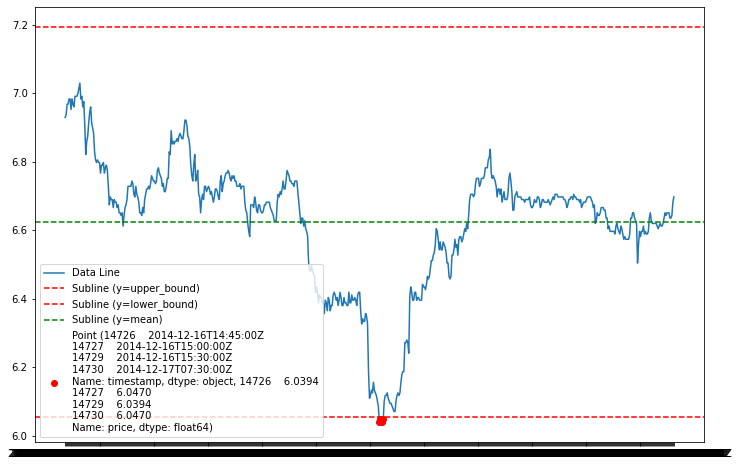

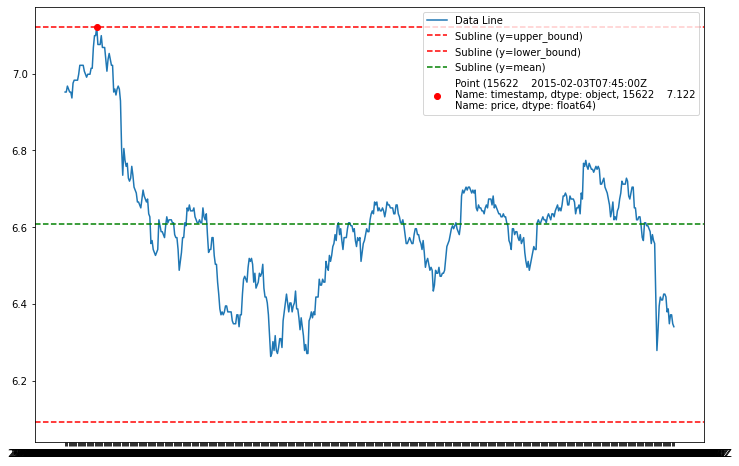

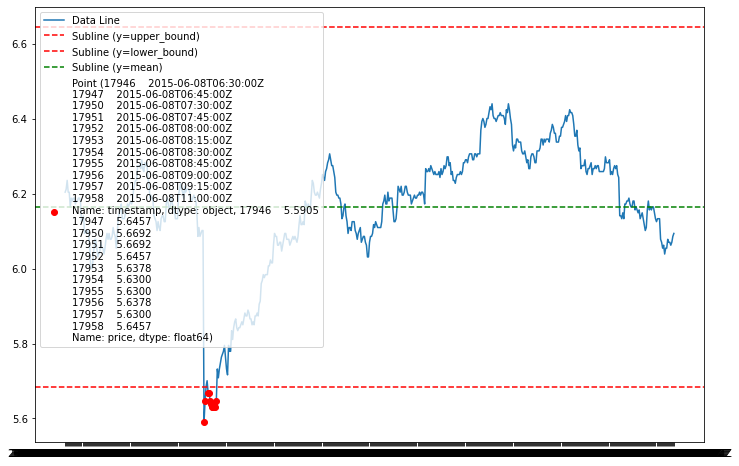

In [16]:
find_outliers(akbnk_grouped_data)

**The outlier points of PGSUS:**

     company             timestamp  price  Year Month Day Hour Minute Second
4977   PGSUS  2014-01-31T14:30:00Z   26.5  2014    01  31   14     30    00Z
4978   PGSUS  2014-01-31T14:45:00Z   26.4  2014    01  31   14     45    00Z
4979   PGSUS  2014-01-31T15:00:00Z   26.2  2014    01  31   15     00    00Z
4980   PGSUS  2014-01-31T15:15:00Z   26.0  2014    01  31   15     15    00Z
4981   PGSUS  2014-01-31T15:30:00Z   26.0  2014    01  31   15     30    00Z
     company             timestamp  price  Year Month Day Hour Minute Second
4982   PGSUS  2014-02-03T07:30:00Z   24.9  2014    02  03   07     30    00Z
     company             timestamp  price  Year Month Day Hour Minute Second
7276   PGSUS  2014-06-10T07:00:00Z  30.50  2014    06  10   07     00    00Z
7277   PGSUS  2014-06-10T07:15:00Z  30.45  2014    06  10   07     15    00Z
7279   PGSUS  2014-06-10T07:45:00Z  30.40  2014    06  10   07     45    00Z
7280   PGSUS  2014-06-10T08:00:00Z  30.55  2014    06  10   08     00    00Z

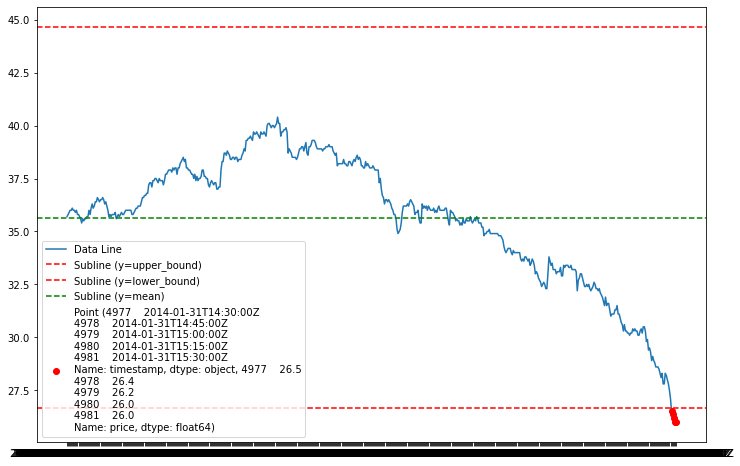

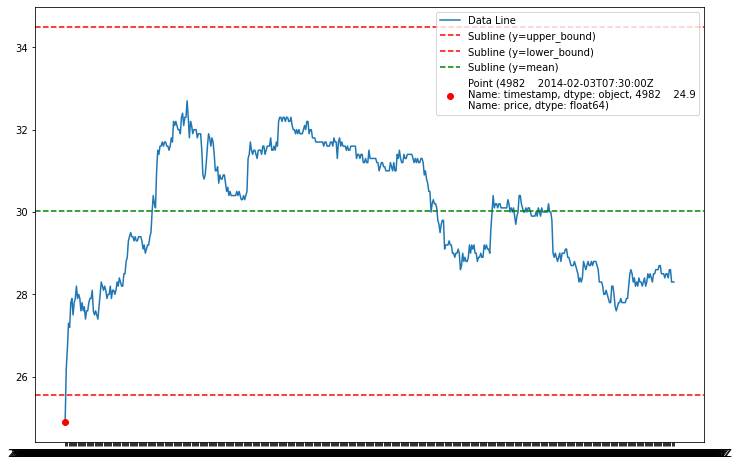

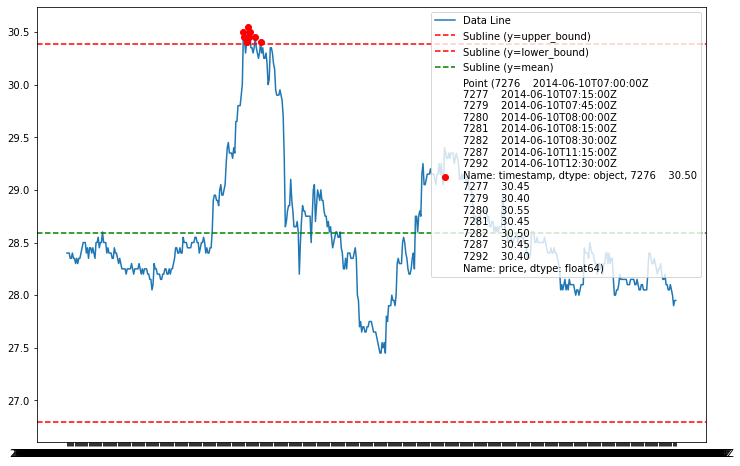

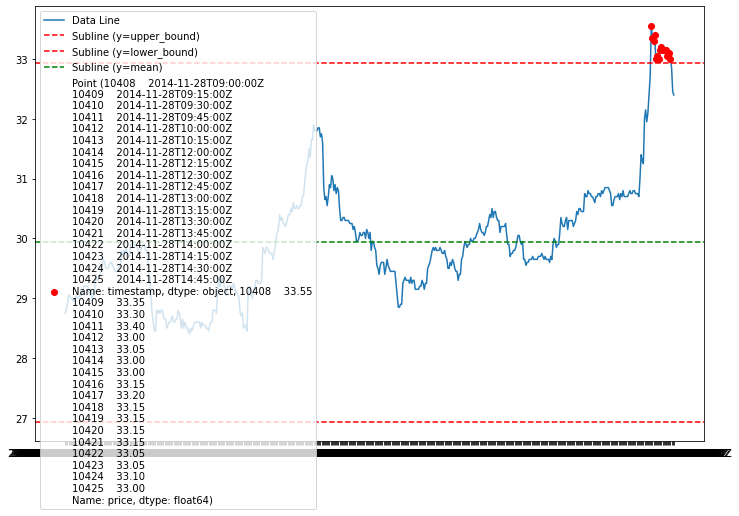

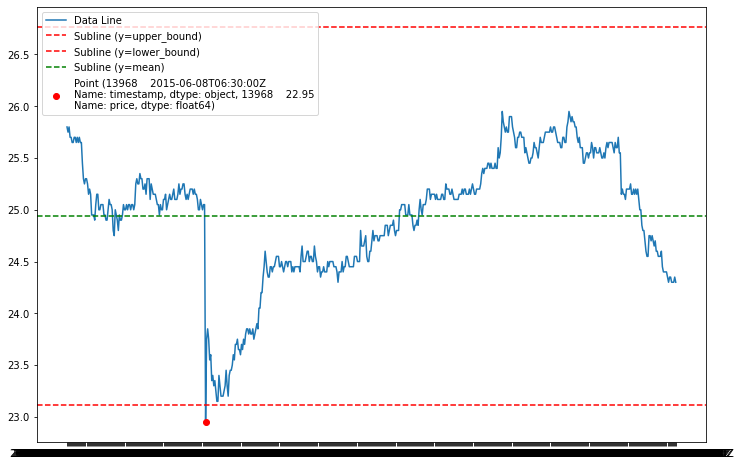

In [17]:
find_outliers(pgsus_grouped_data)

**The outlier points of THYAO:**

      company             timestamp  price  Year Month Day Hour Minute Second
14368   THYAO  2014-11-28T09:00:00Z    9.4  2014    11  28   09     00    00Z


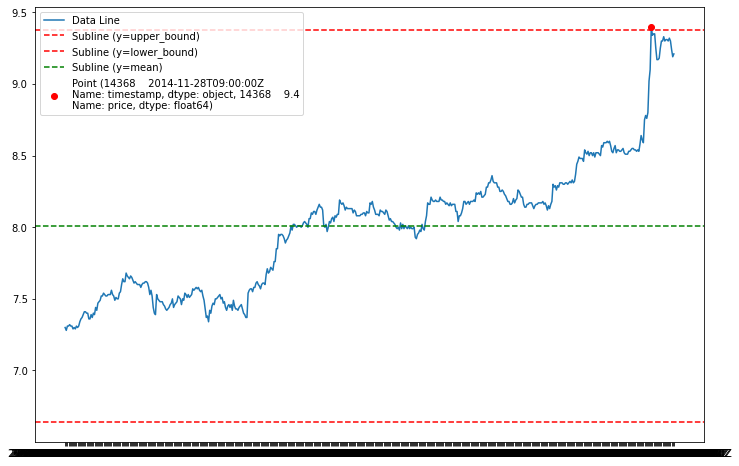

In [18]:
find_outliers(thyao_grouped_data)

# Evaluation of the outliers:

When we examine the outliers, we observed that they can be classified into 3:<br>
1-Non-repetitive Outliers <br>
2-Outliers Due to Interval Limits <br>
3-Reasonable Outliers

## 1) Non-repetitive Outliers

When we examine the outliers in the boxplots and 3-sigma control charts, we notice that some of them can be defined as non-repetitive outliers. In the stock market, such fluctuations can be observed instantaneously without any reason. For example, there may have been low volume transactions at the beginning of the day and the price may be low when the stock market opens. The situation returns to normal within a few hours. For example; 
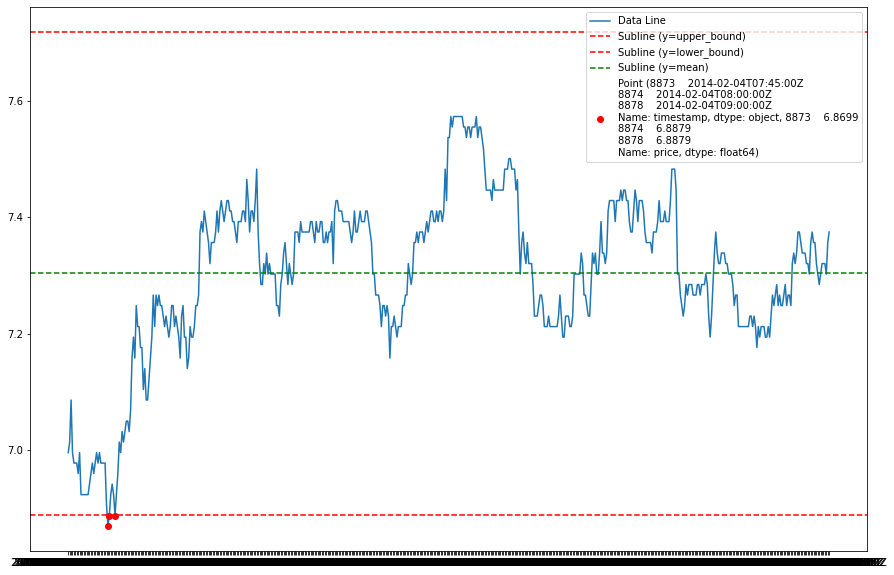 <br>
This is an example of the non-repetive outlier founded in February line-plot of KCHOL. On 04 February 2014 between 07.45-09.00 (see the legend), KCHOL price decreased instantaneously, resulting in 2 outliers. After the significant decrease, market price increased and reached the normal level. Therefore, it can be said that an instantaneous decrease in the price in the morning is not significant.

## 2) Outliers Due to Interval Limit

The reason for observing such outliers is that the control charts are drawn from the 1st to the 30th of the month. Let's say there is an increase in the stock price towards the end of January. If this increase continues in February, we may not consider the increase observed in January as an outlier. If we had drawn the graph for two months (January & February), the mean would have been higher and that increase would have been a normal data point, not an outlier.
An example for this type of outlier is found in the control chart of KCHOL drawn for May, 2014;<br>
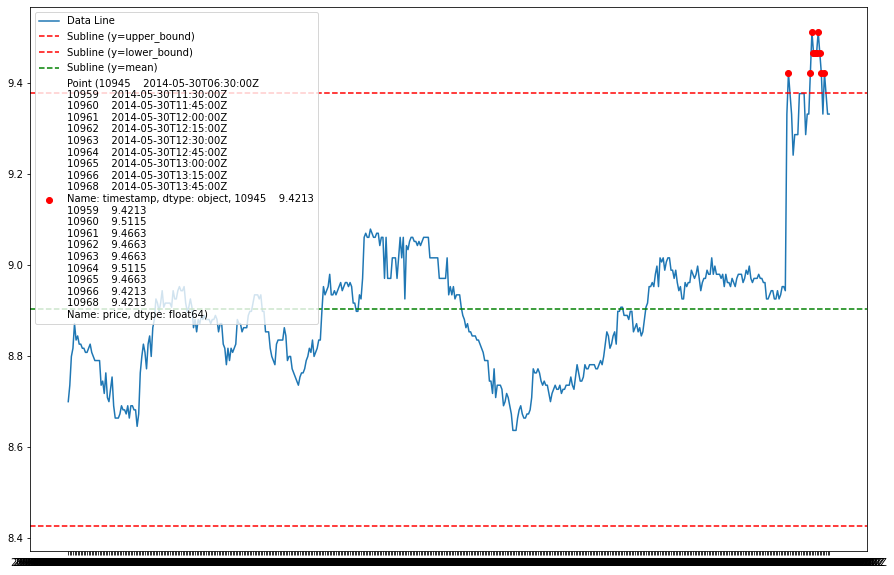<br>

When the graph for May, 2014 is examined just for one month, it can be said that there is a radical increase towards the end of May and some outlier points are observed. 

But if we check the following month, June 2014, we see that the beginning prices are around 9.4, the approximate value of the outlier in the previous graph (May). <br>
 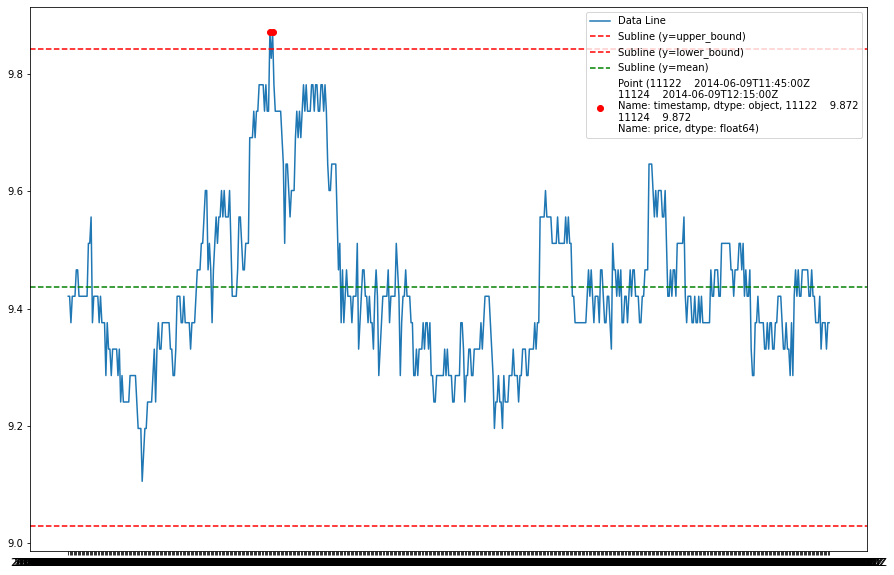 <br>
Also note that, 9.4 is the mean value for June, which was appeared as an outlier in May. Therefore, we can say that, there is an increasing trend between May and June, and the outlier points in the control chart of May is not independent of the following months' data points. Increasing and decreasing market prices are about the nature of the stock market.

## 3) Reasonable Outliers

When the outliers we mentioned are left out, there are other outliers that attract our attention. Especially, December, 2014 data of GARAN and AKBNK seem interesting. A few outliers at the sime time (between 16-12-2014 and 17-12-2014) have occured in both stock prices. <br>
<br>
See the December, 2014 3-sigma line chart of AKBANK:<br>
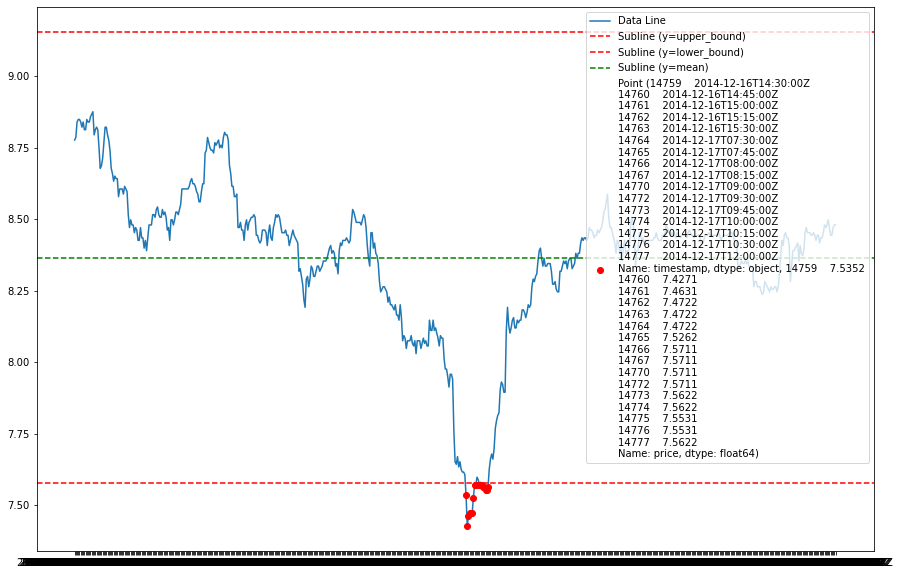<br>

See the same month's 3-sigma chart of GARAN:<br>
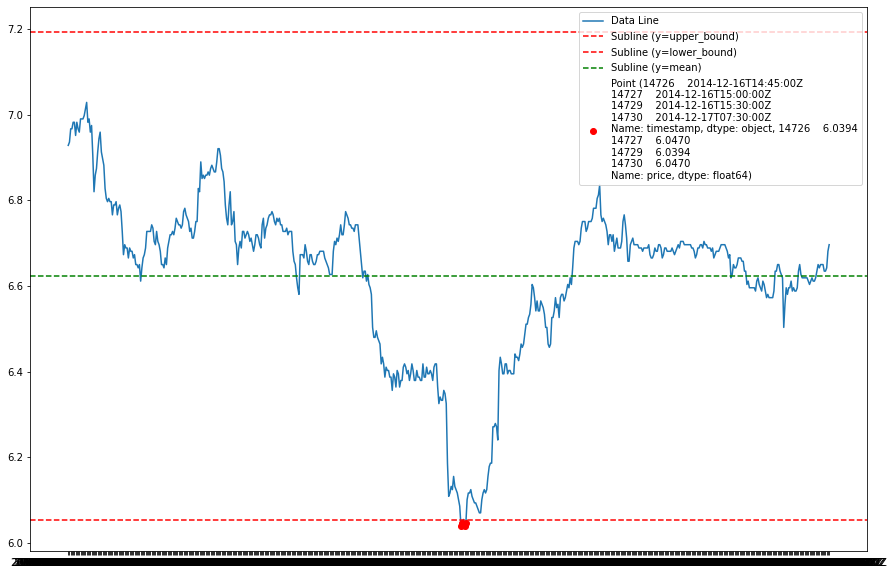<br>

There must be a logical reason why the prices of two companies in the same industry decrease at the same time. When we check the relevent days (16-12-2014 and 17-12-2014) in Google Trends, we noticed that the searching volume of "faiz" (interest rate), "dolar tl" (dollar tl) and "merkez bankası" (central bank) increased significantly. The searching volume graphs are shown below: <br>
<br>
For "faiz": <br>
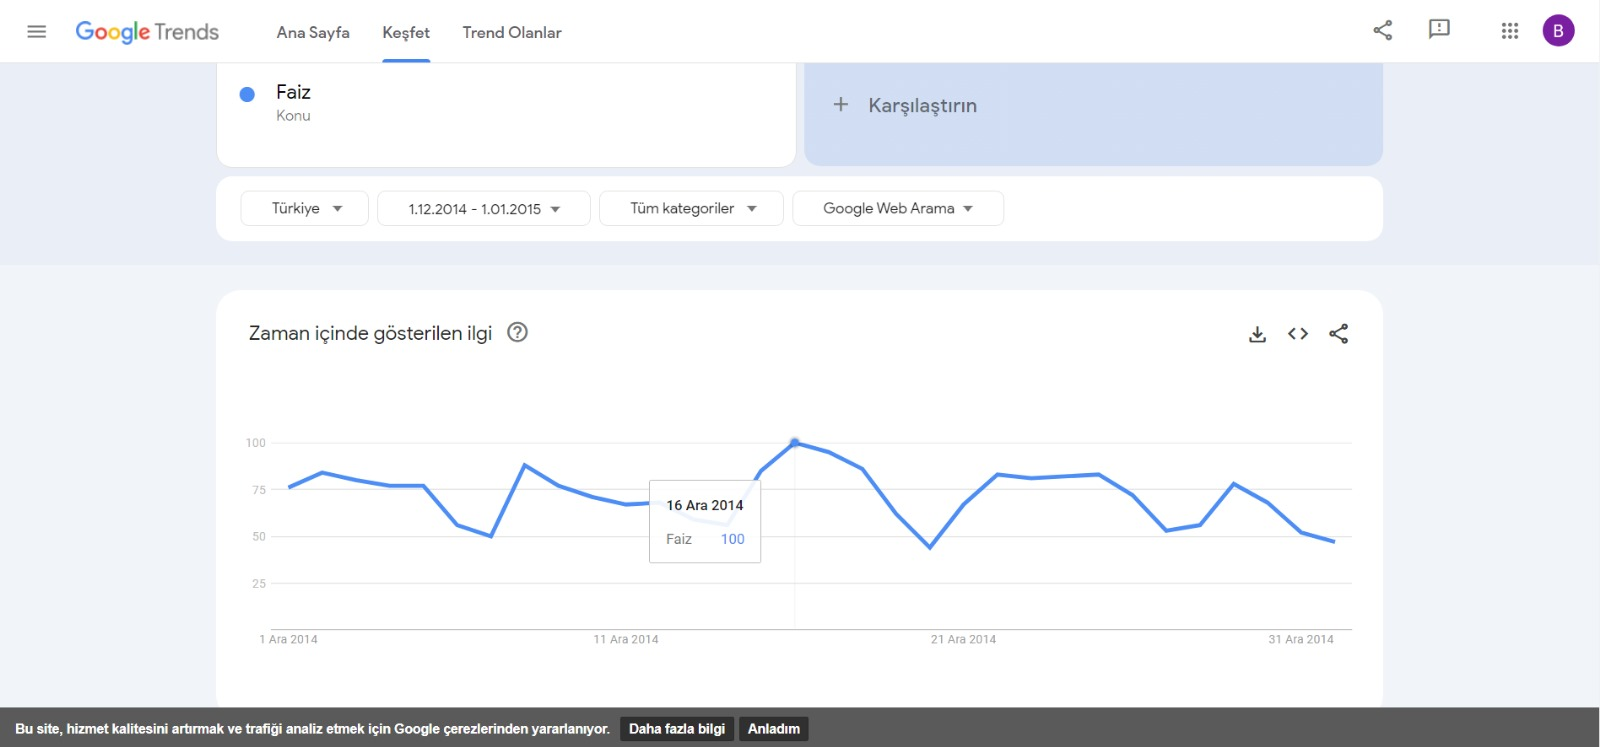<br>


For "merkez bankası": <br>
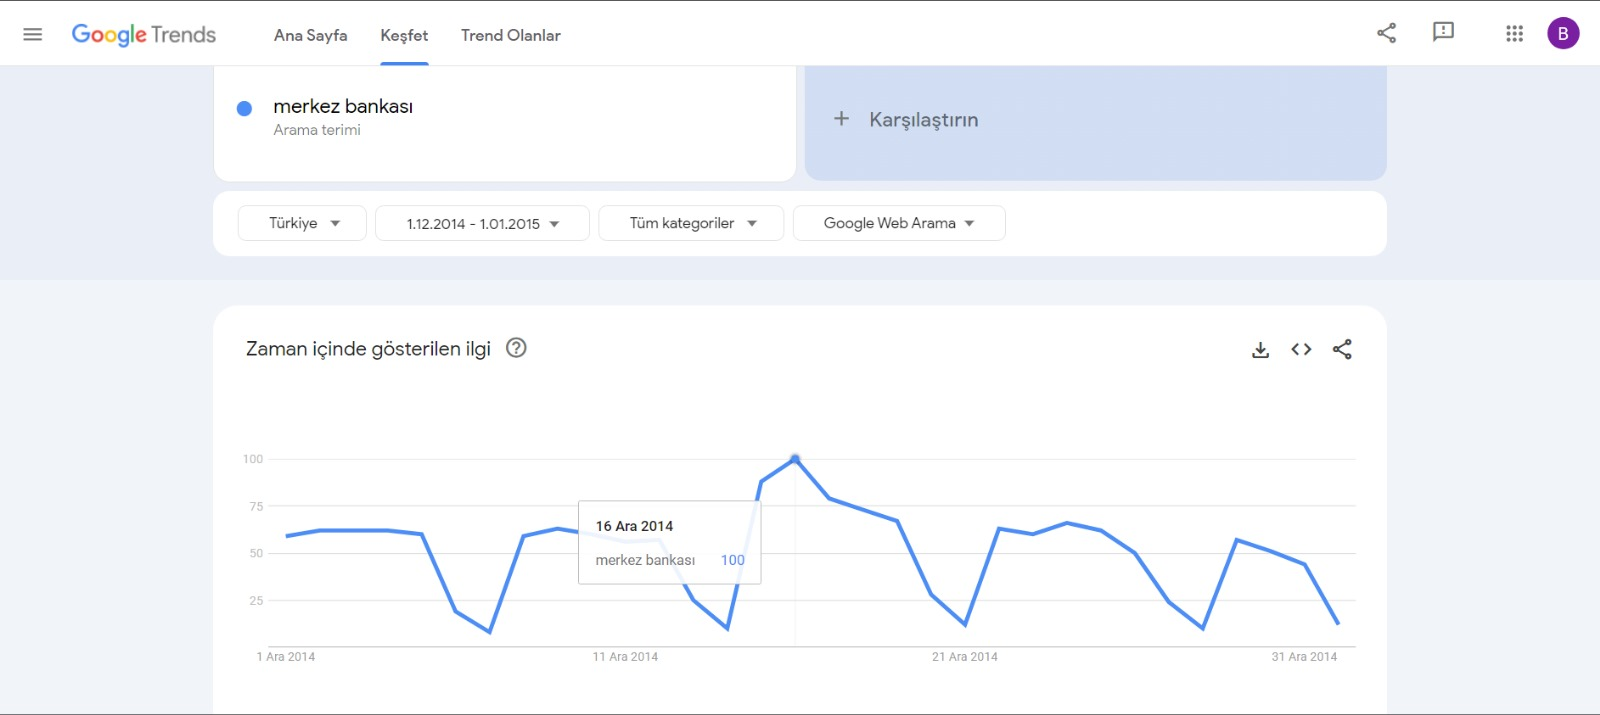 <br>

For "dolar tl": <br>
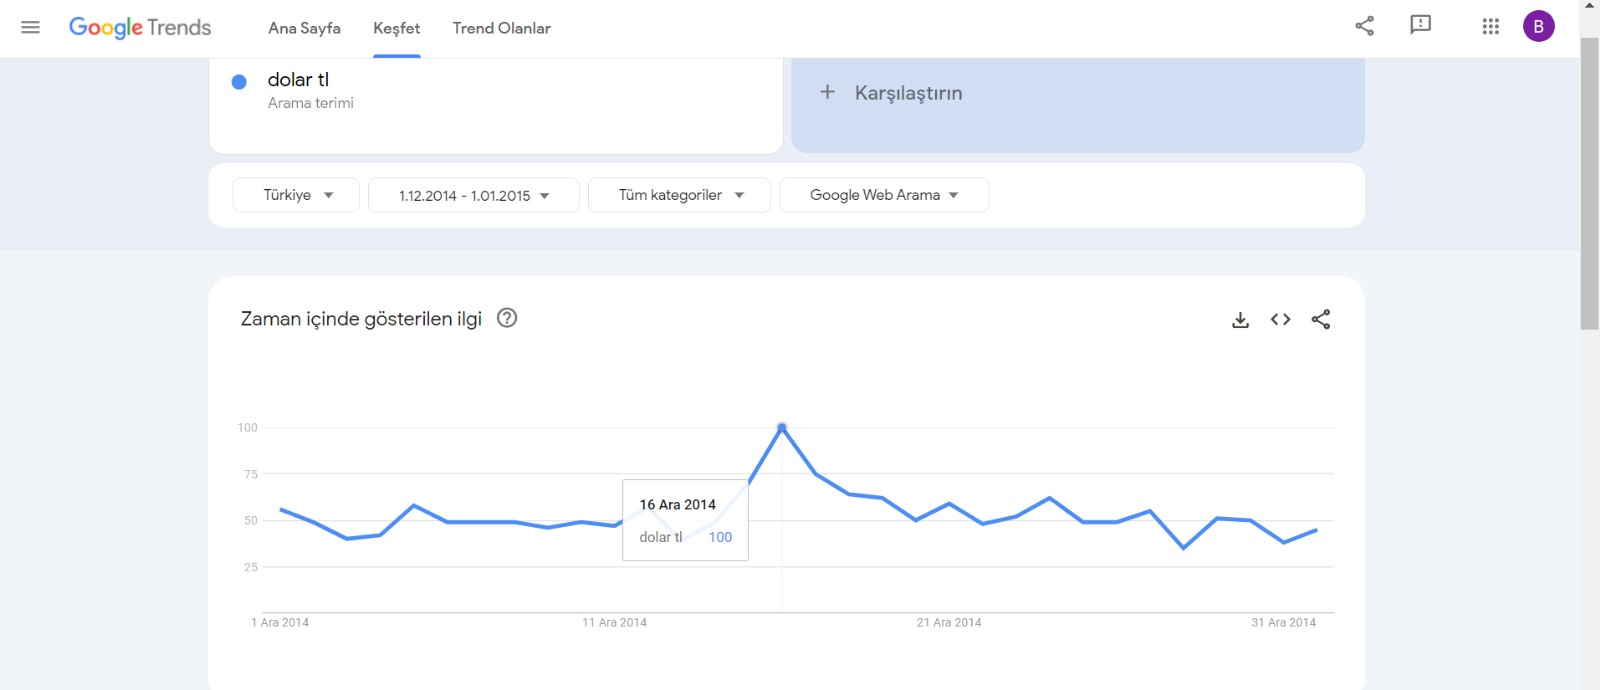 <br>

Outliers in the control charts, box plots, and google trends seem correlated each other. This gave us an idea of a potential event that could have happened on this day. When we search about it, we have reached explainable reasons. When we examine the daily newsletter issued by an investment bank, we noticed the reason of the outliers. 
(Newsletter link: https://www.vakifyatirim.com.tr/files/news_17940.pdf) <br> 
<br>
"The rise in the dollar/TL exchange rate and bond interest yesterday caused a sharp decline in Borsa Istanbul, led by the banking sector. BIST 100 index closed the day with a decrease of 4.36% at 79,191.19 points, the lowest level since November 12. While the banking index decreased by 6.22%...." <br>
<br>
To sum up, the dollar exchange rate increased on that day resulting in a significant decrease in the market prices of banks, causing some outliers in the control charts. <br>
<br>
The fact that the banking index decreased more than BIST 100 index is quite natural. The reason is that the banking index would be affected more after such a serious increase in the exchange rate.

## Summary

When we examine the outliers in the box plot and 3-sigma control charts together, we can notice all the outliers we see in the 3-sigma control charts in the box plots. We should also mention that the control charts allow us to make more logical explanations as it shows us how the price behaves in that month in a fairly continuous time context. By examining these charts, we can point out the abnormal time points and do precise research for these times as to uncover the reason for the outlier data, which is usually a real world event that affected the stock prices. In addition, by examining the charts of multiple companies from the same sectors, we can detect sector-wide fluctuations/shocks (e.g.: the AKBNK and GARAN outliers examined above).

The shortcoming of control charts, which are easier to interpret, is that since they only take one month's data into consideration, they lose the ongoing trend nature of the next and previous months, and create some illogical outliers because of this lost trend. Box plots show us that these were actually not outliers when compared to the previous months. We mentioned this event above as 'Outliers Due to Interval Limit'. Since the increase or rise at the end of any month coincides with the end of the month, it created some outliers. Of course, when doing the outlier examinations, it is important to bear in mind that there are numerous non-repetitive outliers that resulted from short-lived market fluctuations. The researcher should always use his/her logic and initiative when evaluating the outliers.
